In [2]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Preprocesamiento Básico

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [4]:
df = pd.read_csv("titanic.csv")
print(df.shape)
df.head(3)


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

En una sola figura grafique el histograma de la edad, el histograma de la edad centrado en una media de 0 y desviación estándar de 1, y el histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1.

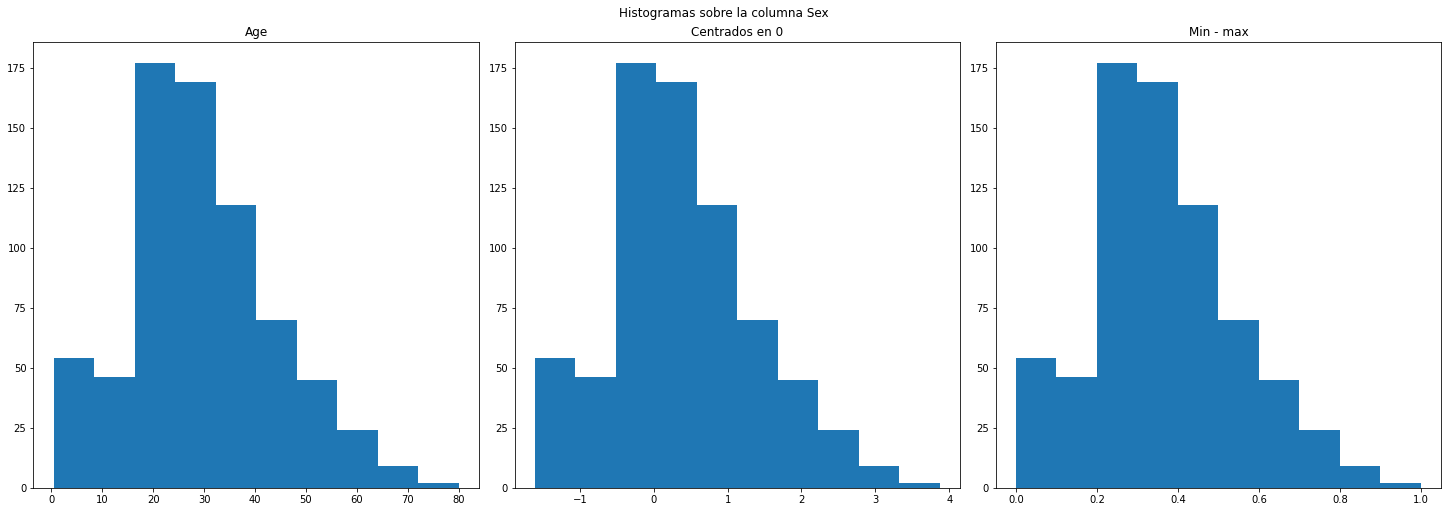

In [5]:
# Calculo de el normalizado
age = df.Age
mean_Age = np.sum(age) / len(age)
std_age = np.std(age)
res = ((age - mean_Age) / std_age)
# sns.histplot(((age - mean_Age) / std_age), label='mean = 0')

# Calculo de minimo y maximo
min_max = (age - np.amin(age)) / (np.amax(age) - np.amin(age))


# Graficas
cm = 1/2.54
fig, (ax, ax1, ax2) = plt.subplots(ncols=3, layout="constrained")
fig.suptitle('Histogramas sobre la columna Sex')

# Primer histograma
ax.hist(age)
ax.set_title('Age')

ax1.hist(res)
ax1.set_title('Centrados en 0')

ax2.hist(min_max)
ax2.set_title('Min - max')
# ax1.set_box_aspect()
# ax2.set_box_aspect()

fig.set_size_inches(20.0, 7.0)

plt.show()


## Asignación 2 &#x1F625;

Calcule e imprima el 
 de la tarifa. Grafique su histograma. Aplique la función de su preferencia para remover el skewness, calcule e imprima el valor del skewness para la función transformada y grafique su histograma.

In [31]:
def standar_data(data):
    return ((data - data.mean()) / np.std(data))

In [61]:
def skewness_reduce(data : pd.Series, log_nat : bool, standar =False):
    # Calculo del skewness
    skewn = ((data - np.mean(data)) / np.std(data)) ** 3
    # print('Nivel de Skewness sin modificacion:', np.mean(skewn))   
     
    fig, ax = plt.subplots(figsize=(10, 5))
    # ax.hist(data)
    sns.histplot(x=data, kde=True, line_kws={'linestyle' : 'dashed',
                                                     'linewidth' : '2'}).lines[0].set_color('red')
    plt.title(f'Data sin modificar, skewness : {np.mean(skewn)}')
    plt.show()
    
    
    if log_nat:
        # Aplicamos el logaritmo natural
        data_mod = np.log1p(data)
        # print(data_mod)
        
        # Calculo de skewn
        skewn = np.mean(((data_mod - np.mean(data_mod)) / np.std(data_mod)) ** 3)
        
        # Grafico 
        fig, ax = plt.subplots(figsize=(10, 5))
        # ax.hist(data_mod)
        sns.histplot(x=data_mod, kde=True, line_kws={'linestyle' : 'dashed',
                                                     'linewidth' : '2'}).lines[0].set_color('red')
        plt.title(f'Plot con logaritmo natural, skewnes = {skewn}')
    else:
        title = ''
        # Comvertimos los datos con raiz cuadrada
        if standar:
            data_mod = np.sqrt(standar_data(data))
            
            skewn = np.mean(((data_mod - np.mean(data_mod)) / np.std(data_mod)) ** 3)
            
            # Grafico
            fig, ax = plt.subplots(figsize=(10,5))
            # ax.hist(data_mod)
            sns.histplot(x=data_mod, kde=True, line_kws={'linestyle' : 'dashed',
                                                        'linewidth' : '2'}).lines[0].set_color('red')
            
            plt.title(f'Plot con datos estandarizados y raiz cuadrada, skewness: {skewn}')
        else:
            data_mod = np.sqrt((data))
            title = 'Plot con datos sin estandarizar y raiz cuadrada, skewness:'
        
            # Calculamos el skewness
            skewn = np.mean(((data_mod - np.mean(data_mod)) / np.std(data_mod)) ** 3)
            
            # Grafico
            fig, ax = plt.subplots(figsize=(10,5))
            # ax.hist(data_mod)
            sns.histplot(x=data_mod, kde=True, line_kws={'linestyle' : 'dashed',
                                                        'linewidth' : '2'}).lines[0].set_color('red')
            plt.title(f'Plot con datos sin estandarizar y raiz cuadrada, skewness: {skewn}')
        
        
        
        # plt.title(title, skewn)

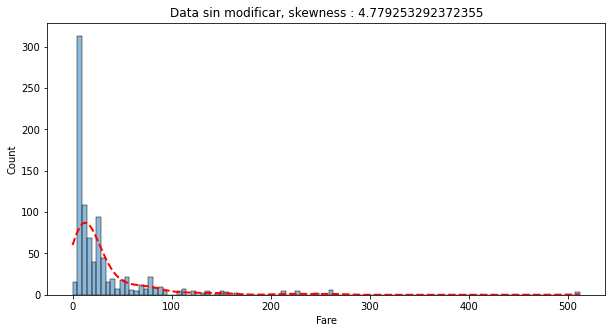

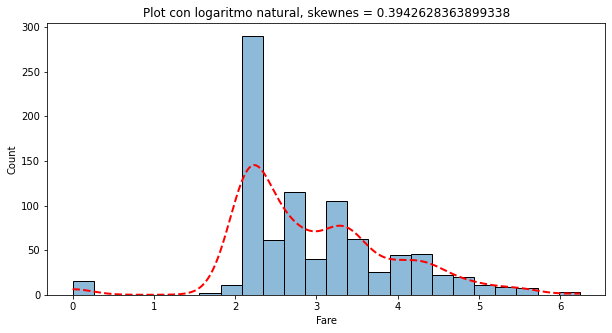

In [62]:
skewness_reduce(df.Fare, True)

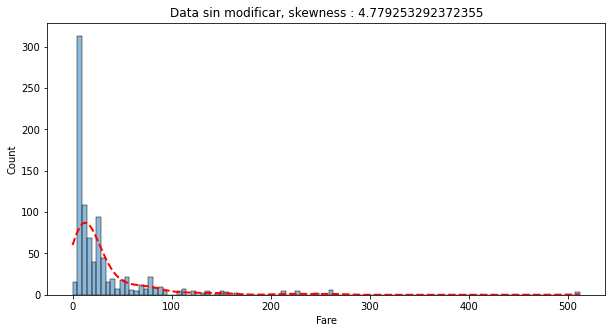

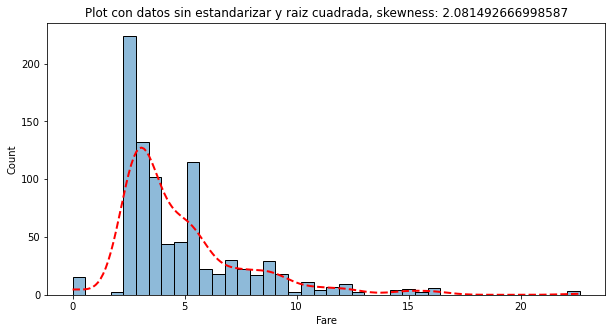

In [50]:
skewness_reduce(df.Fare, False)

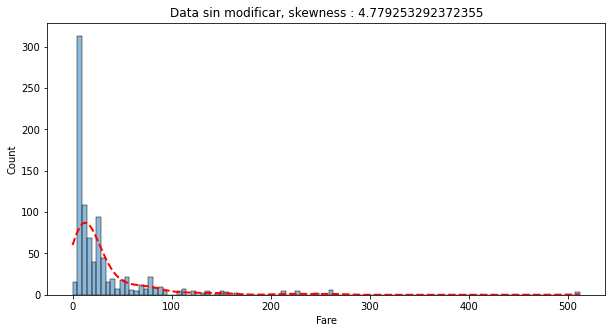

d:\Users\rod_e\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


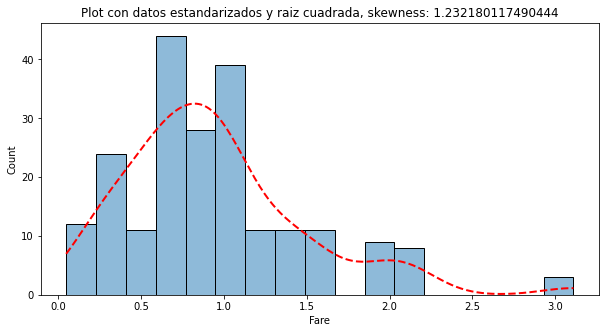

In [51]:
skewness_reduce(df.Fare, False, True)

## Asignación 3 &#x1F921;

Convierta la características __Sex__ y __Embarked__ a su versión de One hot encoding y agreguelas al dataframe original.

In [9]:
# Obtenemos las columnas codificadas
sex_onehot = pd.get_dummies(df.Sex)

# Obtenemos el onehot de Embarked
embarked_onehot = pd.get_dummies(df.Embarked)

# Juntamos las columnas de one hot con el data set original
df = df.join(sex_onehot)
df = df.join(embarked_onehot)

# Eliminamos las columnas extras
df_onehot = df.drop(['Sex', 'Embarked'], axis=1)

# Mostramos el nuevo dataset
df_onehot

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0


## Asignación 4 &#x1F643;

Implemente PCA dentro de una función (usted debe definirla) y apliquela para gráficar en un scatterplot de dos dimensiones los datos. (No incluya las características __Name__, __Ticket__ y __Cabin__).

In [56]:
def pca(X, n_components : int, ploot : bool):
    # Estandarizamos los datos
    # data_estandar = standar_data(X)
    # print(X)
    # Calcula la media de las columnas de X
    X_meaned = X - np.mean(X, axis=0)

    # Calcula la matriz de covarianza de X
    cov_matrix = np.cov(X_meaned.T)#, rowvar=False)

    # Calcula los eigenvalores y eigenvectores de la matriz de covarianza
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Ordena los eigenvalores de mayor a menor y selecciona los n_componentes principales
    sorted_idx = eigenvalues.argsort()[::-1][:n_components]
    sorted_eigenvalues = eigenvalues[sorted_idx]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]

    # Calcula los componentes principales
    pcs = np.dot(X_meaned, sorted_eigenvectors)
    # pcs = np.dot(X_meaned, eigenvectors)
    # pcs = pcs / np.std(pcs)
    

    # Grafica los componentes principales en un scatterplot
    # plt.scatter(pcs[:, 0], pcs[:, 1])
    if ploot:
        sns.scatterplot(data = pcs, x = pcs[:,0], y = pcs[:, 1])
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.title('Scatterplot de los componentes principales')
        plt.show()

    return pcs

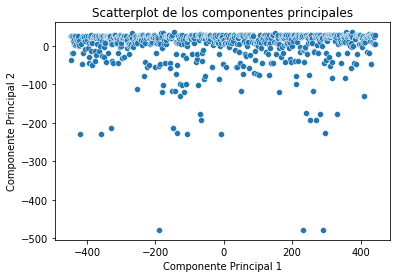

In [57]:
# Seleccionamos los datos a utilizar
data = df_onehot.drop(['Name', 'Ticket', 'Cabin'], axis='columns').dropna()

pc = pca(data, 2, True)